In [1]:
'''
Load packages for working with data
'''
import numpy as np
import pandas as pd


'''
Load packages for plotting graphs
'''
import matplotlib.pyplot as plt
import seaborn as sns


'''
Load packages for model deployment and evaluation
'''
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, \
                                          QuadraticDiscriminantAnalysis
from sklearn.dummy import DummyClassifier

from sklearn.naive_bayes import GaussianNB
import sklearn.linear_model as skl_lm
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, \
                                    KFold, \
                                    cross_val_score
from sklearn.metrics import auc, \
                            confusion_matrix, \
                            classification_report, \
                            roc_curve, \
                            roc_auc_score, \
                            precision_recall_curve, \
                            average_precision_score, \
                            accuracy_score, \
                            balanced_accuracy_score, \
                            precision_score, \
                            recall_score, \
                            cohen_kappa_score, \
                            f1_score

'''
Suppress warnings
'''
import warnings
warnings.filterwarnings('ignore')


'''
Load Standart Scalar for standardization
'''
from sklearn.preprocessing import StandardScaler


In [2]:
'''
Load data with appropriate column names
'''

df = pd.read_csv("PimaIndiansDiabetes.csv")

In [3]:
df.head()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,pos
1,1,85,66,29,0,26.6,0.351,31,neg
2,8,183,64,0,0,23.3,0.672,32,pos
3,1,89,66,23,94,28.1,0.167,21,neg
4,0,137,40,35,168,43.1,2.288,33,pos


In [4]:
df.diabetes = df.diabetes.map({"pos":1, "neg":0})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant    768 non-null int64
glucose     768 non-null int64
pressure    768 non-null int64
triceps     768 non-null int64
insulin     768 non-null int64
mass        768 non-null float64
pedigree    768 non-null float64
age         768 non-null int64
diabetes    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
'''
Separate features and label from the original german dataset
'''
X = df.drop(columns=['diabetes'])
y = df['diabetes']

In [7]:
print('The number of observation is:    {}'.format(len(y)))
print('The number of positive class is: {}'.format(sum(y)))
print('The number of negative class is: {}'.format(sum(y == 0)))

The number of observation is:    768
The number of positive class is: 268
The number of negative class is: 500


In [8]:
'''
train and test datasets
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

In [9]:
print('The number of observation in training set is:    {}'.format(len(y_train)))
print('The number of positive class in training set is: {}'.format(sum(y_train)))
print('The number of negative class in training set is: {}'.format(sum(y_train == 0)))

The number of observation in training set is:    614
The number of positive class in training set is: 213
The number of negative class in training set is: 401


In [10]:
def roc_curve_plot(fpr, tpr):
    '''
    Plot ROC rurve
    
    Parameters: 
    fpr: float
    tpr: float
  
    Returns: 
    plot: ROC curve graph
    '''
    
    
    x = np.linspace(0,1,100)
    
    plt.figure(figsize = (10,6))
    
    plt.plot(fpr, tpr) 
    
    plt.plot(x,x,".", markersize = 1.6) 
    
    plt.title("ROC Curve")
    
    plt.xlabel("FPR")
    
    plt.ylabel("TPR")
    
    plt.show()

## 2. Apply LDA on the training set.

In [11]:
# sc = StandardScaler() 
# X_train = sc.fit_transform(X_train)  
# X_test = sc.transform(X_test)  

In [12]:
'''
Create the model and fit on training dataset
'''
lda = LinearDiscriminantAnalysis(tol = 0.0000001).fit(X_train,y_train)

In [13]:
'''
Measures wich will be used on confusion matrix and roc-curve calculation
'''
pred_lda_train = lda.predict(X_train)
pred_prob_lda_train = lda.predict_proba(X_train)

In [14]:
'''
Obtain confusion_matrix 
'''
tn_lda_train, fp_lda_train, fn_lda_train, tp_lda_train = confusion_matrix(y_true = y_train, y_pred = pred_lda_train, labels = np.array([0,1])).ravel()

In [15]:
'''
Calculate auc(Area Under the Curve) for positive class
'''
fpr_lda_train, tpr_lda_train, thresholds_lda_train = roc_curve(y_true = y_train, y_score = pred_prob_lda_train[:,1], pos_label = 1)
auc_lda_train = auc(fpr_lda_train,tpr_lda_train)
print(auc_lda_train)

0.8434547434231323


In [16]:
'''
Calculation of metrics using standard functions for training dataset
'''

print('Precision         :{}'.format(precision_score(y_train, pred_lda_train)))

print('Recall            :{}'.format(recall_score(y_train, pred_lda_train)))

print('FPR score         :{}'.format(fp_lda_train / (fp_lda_train+tn_lda_train)))

Precision         :0.7134146341463414
Recall            :0.5492957746478874
FPR score         :0.1172069825436409


In [17]:
'''
Measures wich will be used on confusion matrix and roc-curve calculation
'''
pred_lda_test = lda.predict(X_test)
pred_prob_lda_test = lda.predict_proba(X_test)

In [18]:
'''
Obtain confusion_matrix 
'''
tn_lda_test, fp_lda_test, fn_lda_test, tp_lda_test = confusion_matrix(y_true = y_test, y_pred = pred_lda_test, labels = np.array([0,1])).ravel()

In [19]:
'''
Calculation of metrics using standard functions for test dataset 
'''

print('Precision         :{}'.format(precision_score(y_test, pred_lda_test)))

print('Recall            :{}'.format(recall_score(y_test, pred_lda_test)))

print('FPR score         :{}'.format(fp_lda_test / (fp_lda_test+tn_lda_test)))

Precision         :0.6607142857142857
Recall            :0.6727272727272727
FPR score         :0.1919191919191919


Comparing obtained result we can say that Prcision is greather for train dataset but Recall and FPR are greather for test dataset , so we can ay that we have no overfiting here

## 3. Apply QDA on the training set.

In [20]:
'''
Create the model and fit on training dataset
'''
qda = QuadraticDiscriminantAnalysis(tol = 0.0000001).fit(X_train,y_train)

In [21]:
'''
Measures wich will be used on confusion matrix and roc-curve calculation
'''
pred_qda_train = qda.predict(X_train)
pred_prob_qda_train = qda.predict_proba(X_train)

In [22]:
'''
Obtain confusion_matrix 
'''
tn_qda_train, fp_qda_train, fn_qda_train, tp_qda_train = confusion_matrix(y_true = y_train, y_pred = pred_qda_train, labels = np.array([0,1])).ravel()

In [23]:
'''
Calculate auc(Area Under the Curve) for positive class
'''
fpr_qda_train, tpr_qda_train, thresholds_qda_train = roc_curve(y_true = y_train, y_score = pred_prob_qda_train[:,1], pos_label = 1)
auc_qda_train = auc(fpr_qda_train,tpr_qda_train)
# print(auc_qda_train)

In [24]:
'''
Calculation of metrics using standard functions for training dataset
'''

print('Precision         :{}'.format(precision_score(y_train, pred_qda_train)))

print('Recall            :{}'.format(recall_score(y_train, pred_qda_train)))

print('FPR score         :{}'.format(fp_qda_train / (fp_qda_train+tn_qda_train)))

Precision         :0.6910112359550562
Recall            :0.5774647887323944
FPR score         :0.1371571072319202


In [25]:
'''
Measures wich will be used on confusion matrix and roc-curve calculation
'''
pred_qda_test = qda.predict(X_test)
pred_prob_qda_test = qda.predict_proba(X_test)

In [26]:
'''
Obtain confusion_matrix 
'''
tn_qda_test, fp_qda_test, fn_qda_test, tp_qda_test = confusion_matrix(y_true = y_test, y_pred = pred_qda_test, labels = np.array([0,1])).ravel()

In [27]:
'''
Calculation of metrics using standard functions for test dataset 
'''

print('Precision         :{}'.format(precision_score(y_test, pred_qda_test)))

print('Recall            :{}'.format(recall_score(y_test, pred_qda_test)))

print('FPR score         :{}'.format(fp_qda_test / (fp_qda_test+tn_qda_test)))

Precision         :0.6842105263157895
Recall            :0.7090909090909091
FPR score         :0.18181818181818182


Comparing obtained result we can say that Prcision is greather for train dataset but Recall and FPR are greather for test dataset , so we can ay that we have no overfiting here

## 1. Apply Logistic Regression on the training set.

In [28]:
'''
Create the model and fit on training dataset
'''
lr = skl_lm.LogisticRegression(max_iter=1000,tol=0.000001).fit(X_train,y_train)

In [29]:
'''
Measures wich will be used on confusion matrix and roc-curve calculation
'''
pred_lr_train = lr.predict(X_train)
pred_prob_lr_train = lr.predict_proba(X_train)

In [30]:
'''
Obtain confusion_matrix 
'''
tn_lr_train, fp_lr_train, fn_lr_train, tp_lr_train = confusion_matrix(y_true = y_train, y_pred = pred_lr_train, labels = np.array([0,1])).ravel()

In [31]:
'''
Calculate auc(Area Under the Curve) for positive class
'''
fpr_lr_train, tpr_lr_train, thresholds_lr_train = roc_curve(y_true = y_train, y_score = pred_prob_lr_train[:,1], pos_label = 1)
auc_lr_train = auc(fpr_lr_train,tpr_lr_train)
# print(auc_qda_train)

In [32]:
'''
Calculation of metrics using standard functions for training dataset
'''

print('Precision         :{}'.format(precision_score(y_train, pred_lr_train)))

print('Recall            :{}'.format(recall_score(y_train, pred_lr_train)))

print('FPR score         :{}'.format(fp_lr_train / (fp_lr_train+tn_lr_train)))

Precision         :0.7307692307692307
Recall            :0.5352112676056338
FPR score         :0.10473815461346633


In [33]:
'''
Measures wich will be used on confusion matrix and roc-curve calculation
'''
pred_lr_test = lr.predict(X_test)
pred_prob_lr_test = lr.predict_proba(X_test)

In [34]:
'''
Obtain confusion_matrix 
'''
tn_lr_test, fp_lr_test, fn_lr_test, tp_lr_test = confusion_matrix(y_true = y_test, y_pred = pred_lr_test, labels = np.array([0,1])).ravel()

In [35]:
'''
Calculation of metrics using standard functions for test dataset 
'''

print('Precision         :{}'.format(precision_score(y_test, pred_lr_test)))

print('Recall            :{}'.format(recall_score(y_test, pred_lr_test)))

print('FPR score         :{}'.format(fp_lr_test / (fp_lr_test+tn_lr_test)))

Precision         :0.68
Recall            :0.6181818181818182
FPR score         :0.16161616161616163


Comparing obtained result we can say that Prcision is greather for train dataset but Recall and FPR are greather for test dataset , so we can ay that we have no overfiting here

# 4

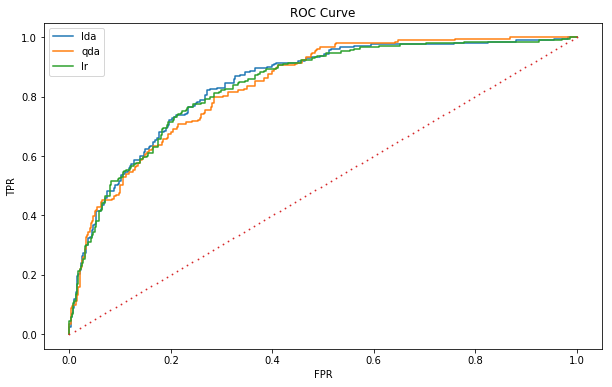

In [36]:
x = np.linspace(0,1,100)

plt.figure(figsize = (10,6))

plt.plot(fpr_lda_train, tpr_lda_train, label = 'lda')
plt.plot(fpr_qda_train, tpr_qda_train, label = 'qda')
plt.plot(fpr_lr_train, tpr_lr_train, label = 'lr')

plt.plot(x,x,".", markersize = 1.6) 

plt.title("ROC Curve")

plt.xlabel("FPR")

plt.ylabel("TPR")

plt.legend()

plt.show()

In [37]:
print('Auc for lda model: {}'.format(auc_lda_train))
print('Auc for qda model: {}'.format(auc_qda_train))
print('Auc for lr  model: {}'.format(auc_lr_train))

Auc for lda model: 0.8434547434231323
Auc for qda model: 0.8380574385632164
Auc for lr  model: 0.8385608748082845


In [38]:
# x = np.linspace(0,1,100)

# plt.figure(figsize = (10,6))

# plt.plot(tp_lda_train/(tp_lda_train+fp_lda_train), tp_lda_train/(tp_lda_train+fn_lda_train), label = 'lda')
# plt.plot(tp_qda_train/(tp_qda_train+fp_qda_train), tp_qda_train/(tp_qda_train+fn_qda_train), label = 'qda')
# plt.plot(tp_lr_train/(tp_lr_train+fp_lr_train), tp_lr_train/(tp_lr_train+fn_lr_train), label = 'lr')

# plt.plot(x,x,".", markersize = 1.6) 

# plt.title("ROC Curve")

# plt.xlabel("FPR")

# plt.ylabel("TPR")

# plt.legend()

# plt.show()

In [39]:
probs = pred_prob_lda_train[:,1]


n = 100
N = len(y_train)

pos = np.sum((y_train == 1))
neg = np.sum((y_train == 0))

h_list = np.linspace(0, 1, n)
recall_list_lda = np.array([])
precision_list_lda = np.array([]) 
fpr_list_lda = np.array([])

for h in h_list:
    ind = (probs > h)
    
    pred = np.repeat(0,N)
    pred[ind] = 1
    
    tn, fp, fn, tp = confusion_matrix(y_true = y_train, y_pred = pred, labels = np.array([0,1])).ravel()
    
    precision_list_lda = np.append(precision_list_lda, tp/(tp+fp))
    recall_list_lda = np.append(recall_list_lda, tp/pos) 
    fpr_list_lda = np.append(fpr_list_lda, fp/neg )


In [40]:
probs = pred_prob_qda_train[:,1]


n = 100
N = len(y_train)

pos = np.sum((y_train == 1))
neg = np.sum((y_train == 0))

h_list = np.linspace(0, 1, n)
recall_list_qda = np.array([])
precision_list_qda = np.array([]) 
fpr_list_qda = np.array([])

for h in h_list:
    ind = (probs > h)
    
    pred = np.repeat(0,N)
    pred[ind] = 1
    
    tn, fp, fn, tp = confusion_matrix(y_true = y_train, y_pred = pred, labels = np.array([0,1])).ravel()
    
    precision_list_qda = np.append(precision_list_qda, tp/(tp+fp))
    recall_list_qda = np.append(recall_list_qda, tp/pos) 
    fpr_list_qda = np.append(fpr_list_qda, fp/neg )


In [41]:
probs = pred_prob_lr_train[:,1]


n = 100
N = len(y_train)

pos = np.sum((y_train == 1))
neg = np.sum((y_train == 0))

h_list = np.linspace(0, 1, n)
recall_list_lr = np.array([])
precision_list_lr = np.array([]) 
fpr_list_lr = np.array([])

for h in h_list:
    ind = (probs > h)
    
    pred = np.repeat(0,N)
    pred[ind] = 1
    
    tn, fp, fn, tp = confusion_matrix(y_true = y_train, y_pred = pred, labels = np.array([0,1])).ravel()
    
    precision_list_lr = np.append(precision_list_lr, tp/(tp+fp))
    recall_list_lr = np.append(recall_list_lr, tp/pos) 
    fpr_list_lr = np.append(fpr_list_lr, fp/neg )


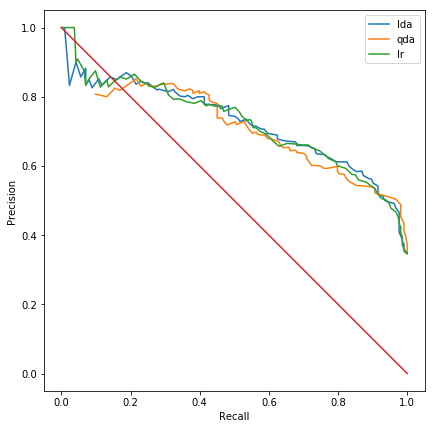

In [42]:
nan_ind = np.isnan(precision_list_lda) 
precision_list_lda[nan_ind] = 1

plt.figure(figsize = (15,7))

plt.subplot(1,2,2)
plt.plot(recall_list_lda, precision_list_lda, label = 'lda')
plt.plot(recall_list_qda, precision_list_qda, label = 'qda')
plt.plot(recall_list_lr, precision_list_lr, label = 'lr')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot(h_list, -h_list + 1)

plt.legend()

plt.show()


According to above plotted graphs and measures , we can say that the best model is lda

## Apply k-NN on the training set and by 10-fold cross validation find the optimal value of the parameter k. For the optimal model draw the ROC curve and calculate the AUC 

In [43]:
'''
Load data with appropriate column names
'''

df = pd.read_csv("Wine.csv")

In [44]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Type               178 non-null int64
Alcohol            178 non-null float64
Malic              178 non-null float64
Ash                178 non-null float64
Alcalinity         178 non-null float64
Magnesium          178 non-null int64
Phenols            178 non-null float64
Flavanoids         178 non-null float64
Nonflavanoids      178 non-null float64
Proanthocyanins    178 non-null float64
Color              178 non-null float64
Hue                178 non-null float64
Dilution           178 non-null float64
Proline            178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [46]:
'''
Separate features and label from the original german dataset
'''
X = df.drop(columns=['Type'])
y = df['Type']

In [47]:
'''
train and test datasets
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

In [48]:
'''
Find the optimal value of the parameter k for knn
'''
K = np.arange(1,25)

scores = []

for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    kfold = KFold(n_splits=10)
    
    score = cross_val_score(knn, X_train, y_train, cv = kfold, scoring = "accuracy")
    
    scores.append(score)

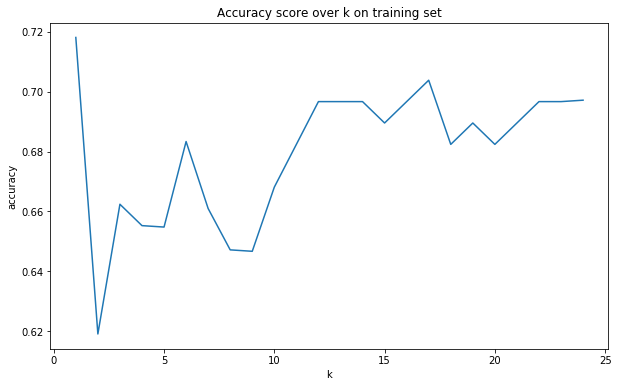

In [49]:
'''
Plot accuracy over various k to find the optimal one.
'''
plt.figure(figsize = (10,6))

plt.plot(K, np.mean(np.array(scores), axis = 1))

plt.title('Accuracy score over k on training set')

plt.xlabel('k')

plt.ylabel('accuracy')

plt.show()

In [50]:
'''
Fit the best model
'''
optimal_k = np.argmax(np.mean(scores, axis=1)) + 1

optimal_knn = KNeighborsClassifier(n_neighbors = optimal_k)
optimal_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [51]:
optimal_knn.score(X_train, y_train)

1.0

In [52]:
'''
Measures wich will be used on confusion matrix and roc-curve calculation
'''
pred = optimal_knn.predict(X_train)
pred_prob = optimal_knn.predict_proba(X_train)

In [53]:
cnf_matrix = confusion_matrix(y_train, pred)

In [54]:
print(cnf_matrix)

[[45  0  0]
 [ 0 57  0]
 [ 0  0 40]]


In [55]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [56]:
TPR

array([1., 1., 1.])

All three classes have the same TPR measure : 1

In [57]:
'''
Measures wich will be used on confusion matrix and roc-curve calculation
'''
pred = optimal_knn.predict(X_test)
pred_prob = optimal_knn.predict_proba(X_test)

In [58]:
cnf_matrix = confusion_matrix(y_test, pred)

In [59]:
print(cnf_matrix)

[[12  0  2]
 [ 3 11  0]
 [ 1  2  5]]


In [60]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [61]:
TPR

array([0.85714286, 0.78571429, 0.625     ])

In [62]:
y_train.unique()

array([3, 2, 1], dtype=int64)

Class 1 has the biggest TPR 

In [63]:
optimal_knn.score(X_test, y_test)

0.7777777777777778

In [64]:
kfold = KFold(n_splits=10)
    
score = cross_val_score(optimal_knn, X_test, y_test, cv = kfold, scoring = "accuracy")

In [65]:
score.mean()

0.775

Accuracy with cros validation and without that are close to each other 